In [1]:
import pandas as pd
from pandas import Series, DataFrame
# import matplotlib.pyplot for data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [2]:
credit1 = pd.read_csv('credit.csv', header = 0)

In [3]:
credit1.head()

,Unnamed: 0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,0,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,1,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,2,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,3,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,4,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# remove Unnamed: 0 column feature
credit1 = credit1.drop(['Unnamed: 0'], axis = 1)

In [5]:
credit1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
# Column Names
credit1.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [7]:
# information about the data set
credit1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                

In [8]:
# Number of customers in each education class
credit1.groupby('EDUCATION')['EDUCATION'].count()

EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: EDUCATION, dtype: int64

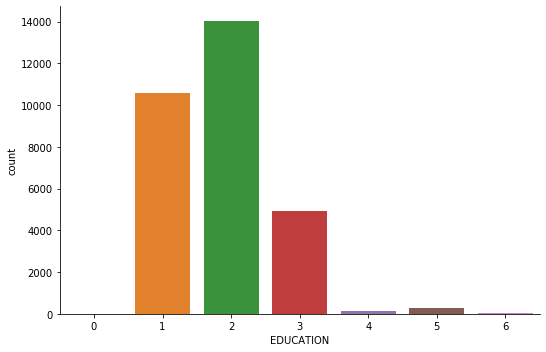

In [9]:
# Use seaborn to plot the customer count in each education class ( 1= graduate school, 2= college, 
# 3= highschool, 0,4-6 = other)
fg = sns.catplot('EDUCATION', data=credit1, kind='count', aspect=1.5)
fg.set_xlabels('EDUCATION')

In [10]:
# determne gender count. (1=male, 2= female)
credit1.groupby('SEX')['SEX'].count()

SEX
1    11888
2    18112
Name: SEX, dtype: int64

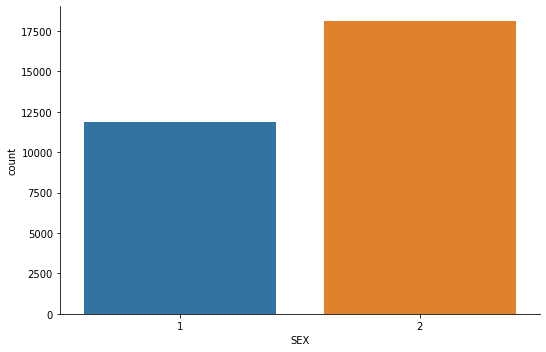

In [11]:
# use sea born to plot the number of males (1) and females (2)
sns.catplot('SEX', data= credit1, kind='count', aspect=1.5)

In [12]:
# number of males and females in each Education class
credit1.groupby(['SEX', 'EDUCATION'])['SEX'].count()

SEX  EDUCATION
1    0               8
     1            4354
     2            5374
     3            1990
     4              42
     5              95
     6              25
2    0               6
     1            6231
     2            8656
     3            2927
     4              81
     5             185
     6              26
Name: SEX, dtype: int64

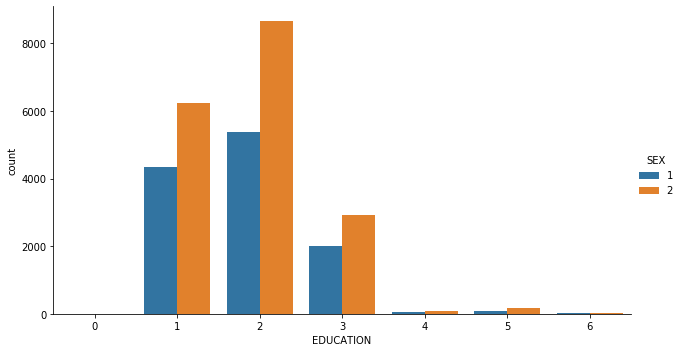

In [13]:
# use seaborn to plot by sex and Education class ( 1= graduate school, 2= college, 
# 3= highschool, 0,4-6 = other)
g = sns.catplot('EDUCATION', data= credit1, hue='SEX', kind='count', aspect=1.75)
g.set_xlabels('EDUCATION')

As shown in the figure above, there are more than 25% female than males that have completed either highschool, college, or graduate school. However, in the 'other' category the ration is approximately equal.

In [17]:
# Number of customers who default on loan in October 2005 grouped by sex. Also a totalwas found 
# each class.
credit1.pivot_table('default_payment_Oct_2005', 'SEX', 'EDUCATION', aggfunc=np.sum, margins=True)

EDUCATION,0,1,2,3,4,5,6,All
SEX,,,,,,,,
1,0,906,1408,545,4,6,4,2873
2,0,1130,1922,692,3,12,4,3763
All,0,2036,3330,1237,7,18,8,6636


In [66]:
# define those not in default
not_default= credit1[credit1['default_payment_Oct_2005']==0]

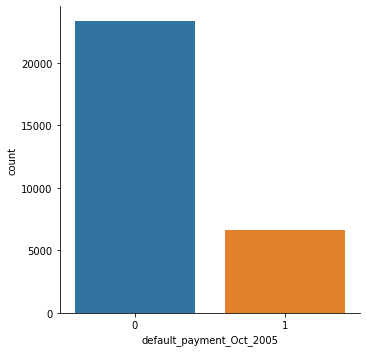

In [67]:
#catplot those who are in defoult vs those not in defoult Oct. 2005
sns.catplot('default_payment_Oct_2005', data= credit1, kind='count')

In [46]:
# total number not in default
len(not_default)

23364

In [16]:
# rename column
credit1.rename(columns = {'default payment next month':'default_payment_Oct_2005'}, inplace= True)

In [62]:
# Customer in default and not in default groped by education and sex
table = pd.crosstab(index=[credit1.default_payment_Oct_2005, credit1.EDUCATION], columns=[credit1.SEX])

In [63]:
table.unstack()

SEX                         1                                              2  \
EDUCATION                   0       1       2       3     4     5     6    0   
default_payment_Oct_2005                                                       
0                         8.0  3448.0  3966.0  1445.0  38.0  89.0  21.0  6.0   
1                         NaN   906.0  1408.0   545.0   4.0   6.0   4.0  NaN   

SEX                                                                  
EDUCATION                      1       2       3     4      5     6  
default_payment_Oct_2005                                             
0                         5101.0  6734.0  2235.0  78.0  173.0  22.0  
1                         1130.0  1922.0   692.0   3.0   12.0   4.0

In [21]:
# look at AGE of our customers
print('Average and median age of customers are %0.f and %0.f years old, respectively.'%(credit1.AGE.mean(),credit1.AGE.median()))

Average and median age of customers are 35 and 34 years old, respectively.


In [76]:
credit1.AGE.describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

Text(0.5, 1.0, "Distrubution of Customers' Ages")

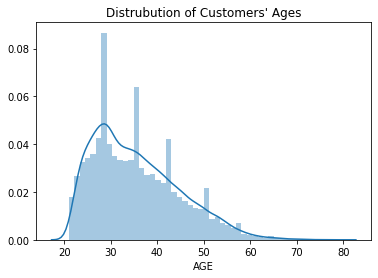

In [26]:
# Distribution customer age, with an overlay of a desity plot
age_dist = sns.distplot(credit1.AGE)
age_dist.set_title("Distrubution of Customers' Ages")

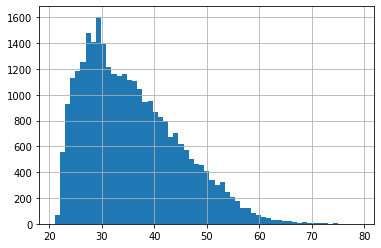

In [30]:
# Another way to look at age by histogram
credit1['AGE'].hist(bins=59)

In [38]:
#create a function to define those who are young (less than 30)
def male_female_young(customer):
    AGE, SEX = customer
    if AGE<30:return'young'
    if SEX<2:return'male'
    if SEX>1:return'female'
   

In [39]:
# add a column to credit1 describing 'person'
credit1['person']=credit1[[AGE,SEX]].apply(male_female_child, axis=1)

In [40]:
# take a look at the first 10 rows of credit1 data to see new column 
credit1[:10]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_Oct_2005,person
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,1,young
1,120000,2,2,2,26,-1,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,young
2,90000,2,2,2,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,female
3,50000,2,2,1,37,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,female
4,50000,1,2,1,57,-1,0,-1,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,male
5,50000,1,1,2,37,0,0,0,0,0,...,19619,20024,2500,1815,657,1000,1000,800,0,male
6,500000,1,1,2,29,0,0,0,0,0,...,483003,473944,55000,40000,38000,20239,13750,13770,0,young
7,100000,2,2,2,23,0,-1,-1,0,0,...,-159,567,380,601,0,581,1687,1542,0,young
8,140000,2,3,1,28,0,0,2,0,0,...,11793,3719,3329,0,432,1000,1000,1000,0,young
9,20000,1,3,2,35,-2,-2,-2,-2,-1,...,13007,13912,0,0,0,13007,1122,0,0,male


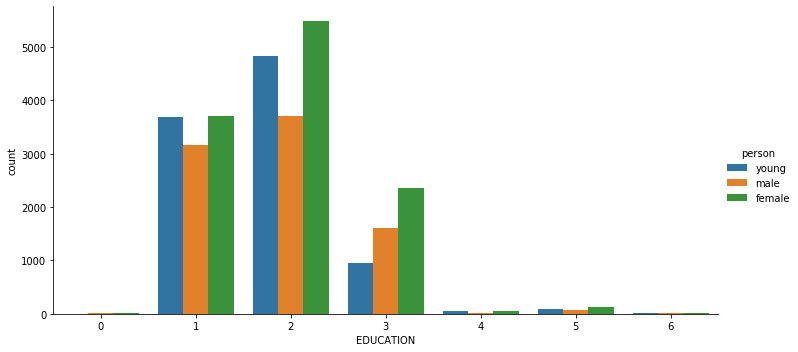

In [46]:
#catplot for customers splitt into sex,young,and education
sns.catplot('EDUCATION',data = credit1, kind='count', hue='person', order=[0,1,2,3,4,5,6], hue_order = ['young', 'male','female'],aspect=2)

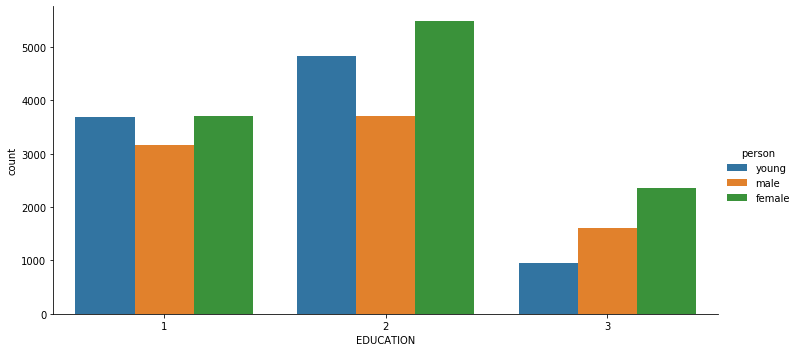

In [47]:
#catplot for customers split into sex,young and graduate school, college, and high school
sns.catplot('EDUCATION',data = credit1, kind='count', hue='person', order=[1,2,3], hue_order = ['young', 'male','female'],aspect=2)

In [48]:
# count number of men, women and young adult
credit1['person'].value_counts()

female    11775
young      9618
male       8607
Name: person, dtype: int64

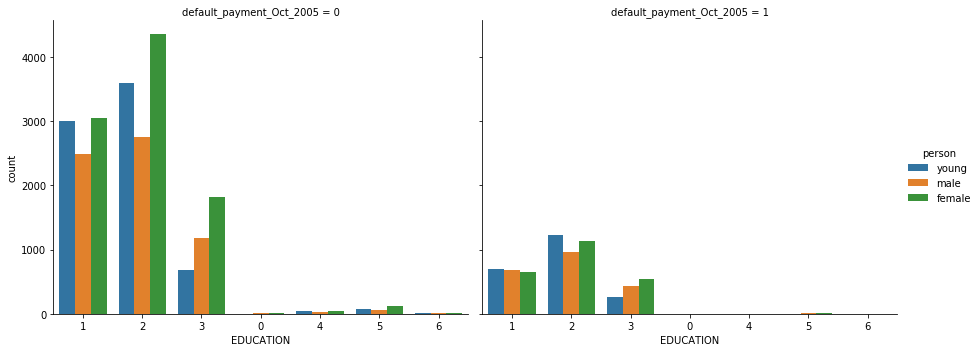

In [52]:
# split the customers into default or not default in Oct 2005
sns.factorplot('EDUCATION', data=credit1, kind='count', hue = 'person', col='default_payment_Oct_2005', order=[1,2,3,0,4,5,6],
              hue_order=['young','male', 'female'], aspect=1.25, size=5)

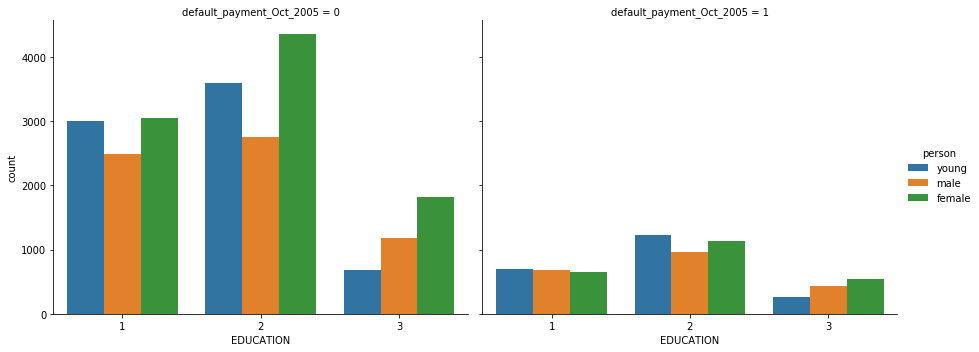

In [53]:
# split the customers into default or not default in Oct 2005 (grad school, college, high school)
sns.factorplot('EDUCATION', data=credit1, kind='count', hue = 'person', col='default_payment_Oct_2005', order=[1,2,3],
              hue_order=['young','male', 'female'], aspect=1.25, size=5)

There are more people in the college education catergory that default on their Oct. 2005 payment than in grad school and highschool catergories. From the college education category there are more young adults that  default on their Oct 2005 payment that males and females. 

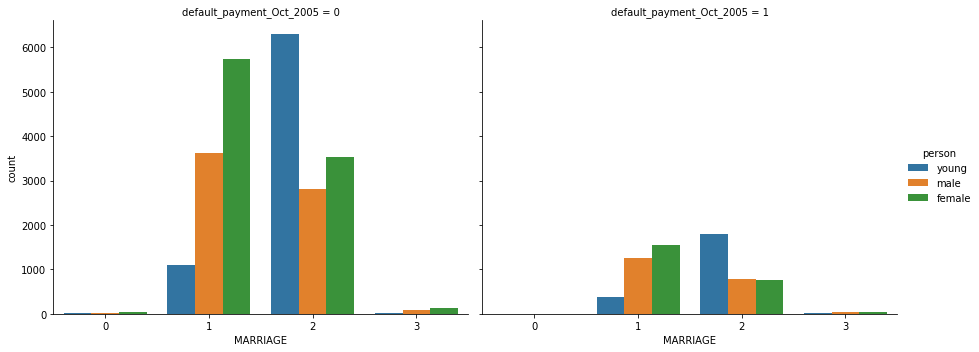

In [72]:
# split the customers into default or not default in Oct 2005 (0 other,1 married,2 single, 3 divorced)
sns.factorplot('MARRIAGE', data=credit1, kind='count', hue = 'person', col='default_payment_Oct_2005', order=[0,1,2,3],
              hue_order=['young','male','female'], aspect=1.25, size=5)

# kde plot, Distribution of customer Ages

## Grouped by gender

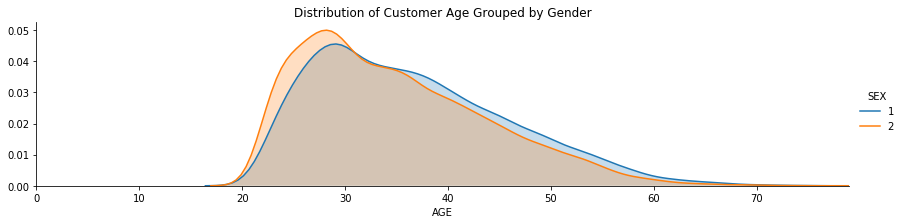

In [56]:
fig = sns.FacetGrid(credit1, hue='SEX', aspect=4)
fig.map(sns.kdeplot,'AGE', shade=True)
oldest = credit1['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Customer Age Grouped by Gender')
fig.add_legend()

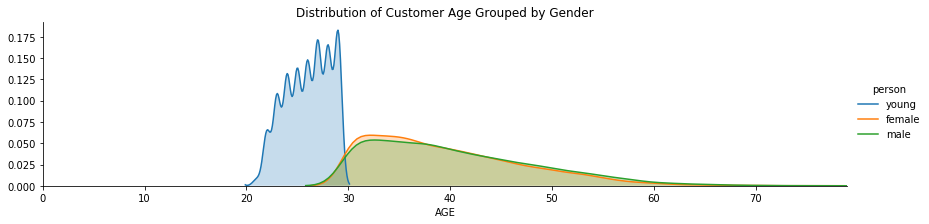

In [66]:
# include young adults
fig = sns.FacetGrid(credit1, hue='person', aspect=4)
fig.map(sns.kdeplot,'AGE', shade=True)
oldest = credit1['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Customer Age Grouped by Gender')
fig.add_legend()

## Grouped by Education Class

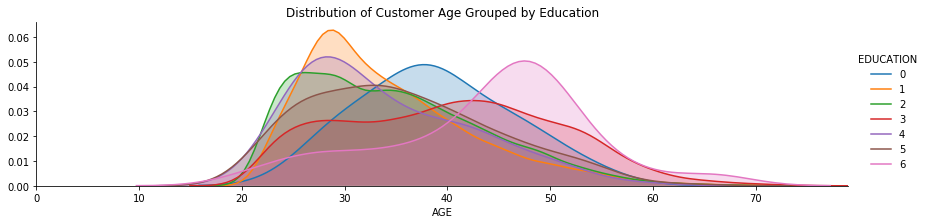

In [67]:
fig = sns.FacetGrid(credit1, hue='EDUCATION', aspect=4)
fig.map(sns.kdeplot,'AGE', shade=True)
oldest = credit1['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Customer Age Grouped by Education')
fig.add_legend()

## Grouped by defaul status in October 2005

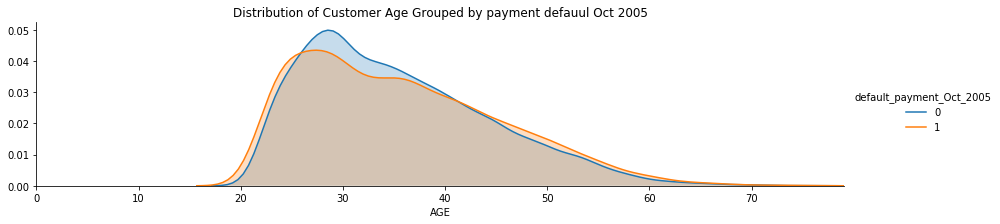

In [68]:
fig = sns.FacetGrid(credit1, hue='default_payment_Oct_2005', aspect=4)
fig.map(sns.kdeplot,'AGE', shade=True)
oldest = credit1['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Customer Age Grouped by payment defauul Oct 2005')
fig.add_legend()

# Factors affecting default

In [74]:
# add new column to credit1 describing default 0=no, 1=yes
credit1['default']=credit1.default_payment_Oct_2005.map({0:'no', 1:'yes'})

In [77]:
# add new column to credit1 describing SEX 1=male, 2=female
credit1['gender']=credit1.SEX.map({1:'male', 2:'female'})

In [78]:
credit1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_Oct_2005,person,default,gender
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,689,0,0,0,0,1,young,yes,female
1,120000,2,2,2,26,-1,2,0,0,0,...,0,1000,1000,1000,0,2000,1,young,yes,female
2,90000,2,2,2,34,0,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,female,no,female
3,50000,2,2,1,37,0,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,female,no,female
4,50000,1,2,1,57,-1,0,-1,0,0,...,2000,36681,10000,9000,689,679,0,male,no,male


## Education Factor

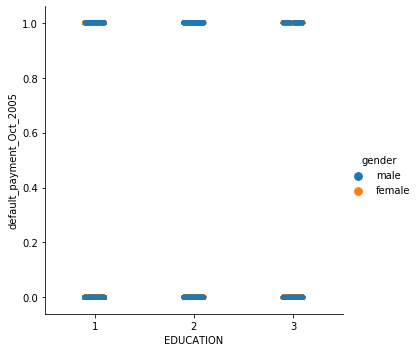

In [85]:
sns.catplot('EDUCATION','default_payment_Oct_2005', hue='gender', data=credit1, order=range(1,4),
           hue_order = ['male', 'female'])

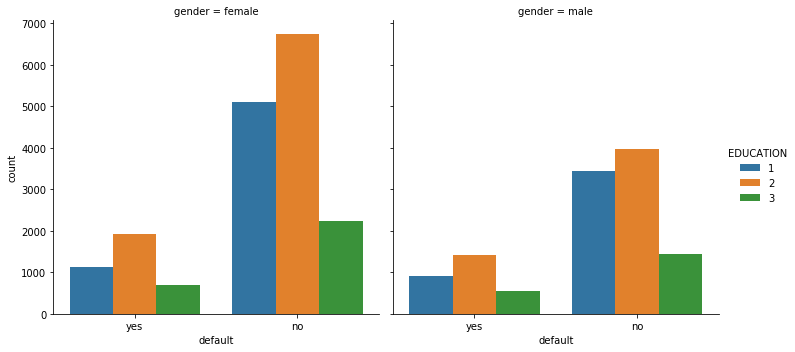

In [90]:
sns.catplot('default', data=credit1, hue='EDUCATION', kind='count', hue_order=range(1,4), col='gender')

## Marital Status Factor

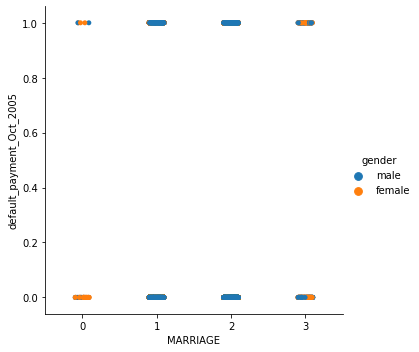

In [103]:
sns.catplot('MARRIAGE','default_payment_Oct_2005', hue='gender', data=credit1, order=range(0,4),
           hue_order = ['male', 'female'])

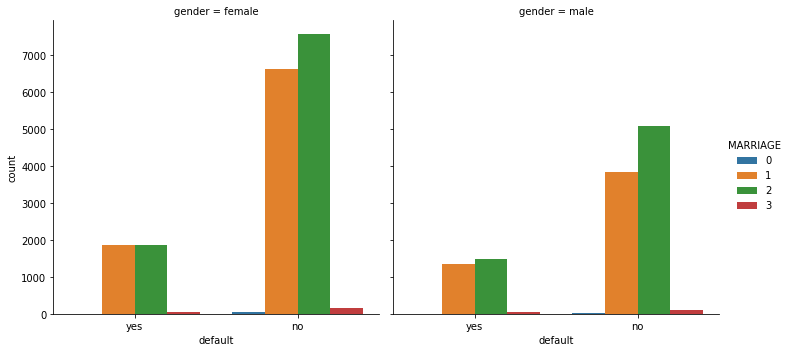

In [93]:
sns.catplot('default', data=credit1, hue='MARRIAGE', kind='count', hue_order=range(0,4), col='gender')

## The Age Factor

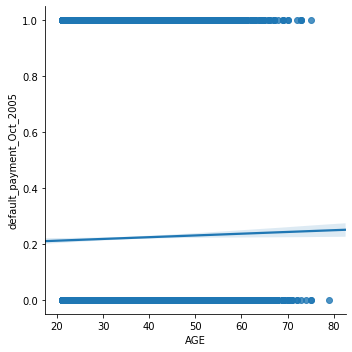

In [95]:
# linear plot of Age vs default
sns.lmplot('AGE', 'default_payment_Oct_2005', data=credit1)

There seem to be a small but general linear trend between age and a default payment in Oct 2005. The plot suggest that the older the customer is the more likely they will default.

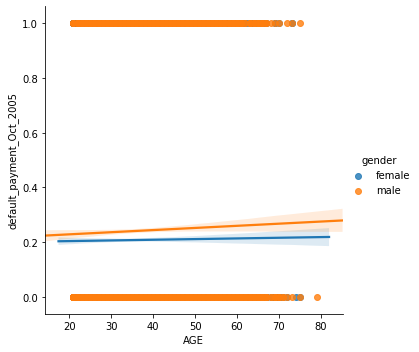

In [96]:
# linear plot of default payment in Oct2005 vs Age by gender
sns.lmplot('AGE', 'default_payment_Oct_2005', data=credit1, hue='gender')

The plot shows that males of all ages have a higher propensity to default a payment and that older males ore more like ly to default than younger males.

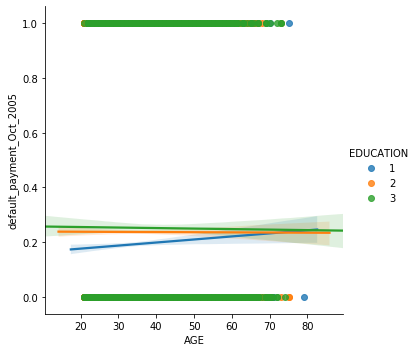

In [99]:
# default Oct 2005 payment vs Age grouped by education
sns.lmplot('AGE', 'default_payment_Oct_2005', hue='EDUCATION', data=credit1, 
           hue_order=range(1,4))

in college and highschool educated customers the chance of default in higher than customers who attended graduate school. however, this changes as age reach approximatly 70. past 70 all three have the similar probability of defaulting.

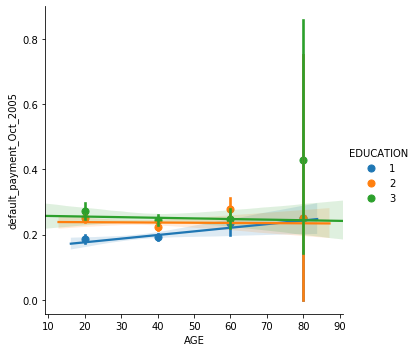

In [101]:
# Create a generation bin
generations =[20,40,60,80]
sns.lmplot('AGE','default_payment_Oct_2005', hue='EDUCATION',data=credit1,x_bins=generations,
           hue_order=[1,2,3])

In [106]:
# add new column to credit1 describing Marital status
credit1['Mstatus']=credit1.MARRIAGE.map({0:'other', 1:'married',2:'single',3:'divorce'})

In [107]:
credit1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_Oct_2005,person,default,gender,Mstatus
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,1,young,yes,female,married
1,120000,2,2,2,26,-1,2,0,0,0,...,1000,1000,1000,0,2000,1,young,yes,female,single
2,90000,2,2,2,34,0,0,0,0,0,...,1500,1000,1000,1000,5000,0,female,no,female,single
3,50000,2,2,1,37,0,0,0,0,0,...,2019,1200,1100,1069,1000,0,female,no,female,married
4,50000,1,2,1,57,-1,0,-1,0,0,...,36681,10000,9000,689,679,0,male,no,male,married


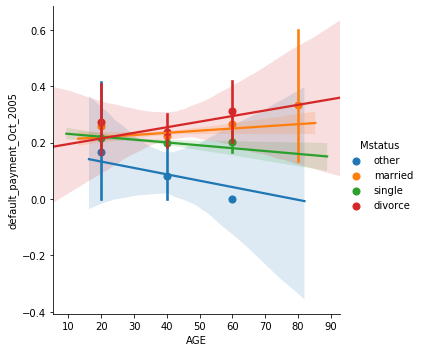

In [109]:
# default Oct 2005 payment vs Age grouped by Marital status
sns.lmplot('AGE','default_payment_Oct_2005', hue='Mstatus',data=credit1,x_bins=generations,
           hue_order=['other','married','single','divorce'])

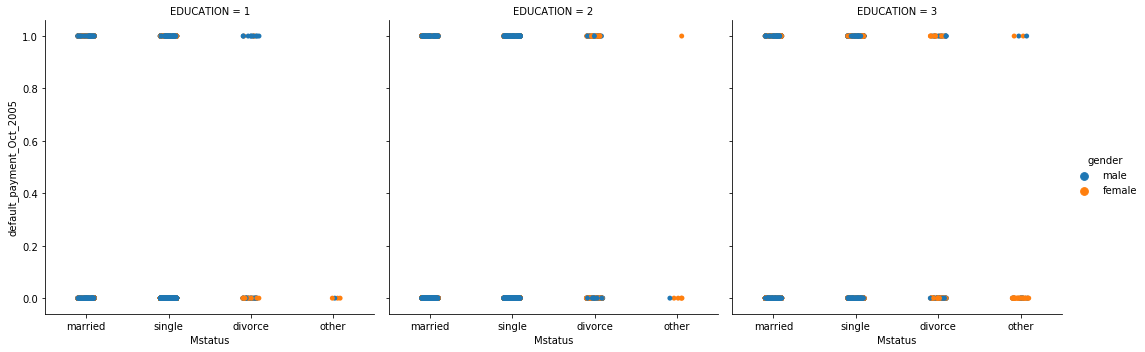

In [112]:
sns.catplot('Mstatus','default_payment_Oct_2005', data=credit1, hue='gender', 
            hue_order=['male', 'female'], col='EDUCATION', col_order=[1,2,3])

In [113]:
# create csv file 
credit1.to_csv("credit1.csv", sep=',')